# Diss Corpus Preprocessing and Word Count

This notebook provides a regular expression based approach to clean the literary text corpus. It opens the corpus texts as a dataframe column and adds new columns as different versions of the texts with annotations as layers. 
In the end, it counts the total word token number of each text separately before summing them up to get the total number of words in the corpus.

In [2]:
# Import 
import os
import pandas as pd
import regex as re
from pathlib import Path
from collections import Counter
import csv
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string



[nltk_data] Downloading package punkt to /Users/sguhr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Read in the corpus

In the following, we read in the corpus. Here, we only take a subset of the corpus to shorten the process time.  

In [43]:
corpus_directory = "/Users/sguhr/Desktop/Diss_Korpus/Diss_Korpus_202303_bereinigt"


In [44]:
# Generate a corpus by loading all the txt files from the chosen directory 
# and list the names of the first 10 txt files 
corpus = os.listdir('/Users/sguhr/Desktop/Diss_Korpus/Diss_Korpus_202303_bereinigt')
corpus[:10]

['von_Wolzogen_Ernst_Vom_Peperl_und von andern_Raritaeten_Der_Raritaetenliabhaber.txt',
 'Anzengruber_Ludwig_Kalendergeschichten_Treff-Ass.txt',
 'Fontane_Theodor_Cecile.txt',
 'Hollaender_Felix_Die_Briefe_des_Fraeulein.txt',
 'Heyse_Paul_Gegen_den_Strom.txt',
 'Peters_August_Blind_und_doch_sehend.txt',
 'Groller_Balduin_Detektiv_Dagobert_Eine_teure_Depesche.txt',
 'von_Zobeltitz_Fedor_Das_Heiratsjahr.txt',
 'Thoma_Ludwig_Nachbarsleute_Bismarck.txt',
 'Heyse_Paul_Marienkind.txt']

In [45]:
#to delete the .DS_Store file that always pops up with Mac

import os

#corpus_directory = "/path/to/your/corpus/directory"
file_to_delete = ".DS_Store"
file_path = os.path.join(corpus_directory, file_to_delete)

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_to_delete} has been deleted.")
else:
    print(f"{file_to_delete} does not exist in the specified directory.")


.DS_Store does not exist in the specified directory.


With the next cell, we ask for the number of corpus texts in the chosen subset. 

In [46]:
# Print how many txt files are in the corpus
corpus_length = len(corpus)
print(corpus_length)

1442


## Convert the corpus to a dataframe 

We then create an empty dictionary and add the file name and the text of the document as columns to build a dataframe of two columns.

In [47]:
# Create an empty dictionary for preparation of the conversion of the txt-file-corpus to a data frame
empty_dictionary = {}

# Loop through the folder of documents to open and read each one
for document in corpus:
    with open('/Users/sguhr/Desktop/Diss_Korpus/Diss_Korpus_202303_bereinigt/' + document, 'r', encoding = 'utf-8') as to_open:
         empty_dictionary[document] = to_open.read()

# Populate the data frame with two columns: file name and document text
diss_corpus_texts = (pd.DataFrame.from_dict(empty_dictionary, 
                                       orient = 'index')
                .reset_index().rename(index = str, 
                                      columns = {'index': 'file_name', 0: 'document_text'}))

In [49]:
#extract the title of the text as a further column with metadata


# Define the regular expression pattern to extract the title followed by double line break \n\n
pattern = r'^(.*?)\n\n'

# Extract the first line and create a new 'titles' column
diss_corpus_texts['title'] = diss_corpus_texts['document_text'].str.extract(pattern, flags=re.DOTALL)
diss_corpus_texts['title'] = diss_corpus_texts['title'].str.replace('<title>', '') # remove xml tags from title column
diss_corpus_texts['title'] = diss_corpus_texts['title'].str.replace('</title>', '') # remove xml tags from title column

# Print the DataFrame to see the results
diss_corpus_texts[:10]

,file_name,document_text,title
0,von_Wolzogen_Ernst_Vom_Peperl_und von andern_R...,<title>Der Raritätenliabhaber</title>\n\n » Ja...,Der Raritätenliabhaber
1,Anzengruber_Ludwig_Kalendergeschichten_Treff-A...,<title>Treff-Aß</title>\n\n\nGibt es ein Buch ...,Treff-Aß
2,Fontane_Theodor_Cecile.txt,<title>Cécile</title>\n\n\n<chapter>Erstes Kap...,Cécile
3,Hollaender_Felix_Die_Briefe_des_Fraeulein.txt,<title>Die Briefe des Fräulein Brandt</title>\...,Die Briefe des Fräulein Brandt
4,Heyse_Paul_Gegen_den_Strom.txt,<title>Gegen den Strom</title>\n\n<chapter>Ers...,Gegen den Strom
5,Peters_August_Blind_und_doch_sehend.txt,<title>Blind und doch sehend</title>\n\n<chapt...,Blind und doch sehend
6,Groller_Balduin_Detektiv_Dagobert_Eine_teure_D...,<title>Eine teure Depesche</title>\n\n\nSie sa...,Eine teure Depesche
7,von_Zobeltitz_Fedor_Das_Heiratsjahr.txt,<title>Das Heiratsjahr</title>\n\n<chapter>Ers...,Das Heiratsjahr
8,Thoma_Ludwig_Nachbarsleute_Bismarck.txt,"<title>Bismarck</title>\n\nDie Wahrheit ist, d...",Bismarck
9,Heyse_Paul_Marienkind.txt,<title>Marienkind</title>\n\nAuf der Landstraß...,Marienkind


In the next cell, we verify the content of the first 10 lines of the dataframe.

In [50]:
# show the first 10 lines of the data frame
diss_corpus_texts[:10]

,file_name,document_text,title
0,von_Wolzogen_Ernst_Vom_Peperl_und von andern_R...,<title>Der Raritätenliabhaber</title>\n\n » Ja...,Der Raritätenliabhaber
1,Anzengruber_Ludwig_Kalendergeschichten_Treff-A...,<title>Treff-Aß</title>\n\n\nGibt es ein Buch ...,Treff-Aß
2,Fontane_Theodor_Cecile.txt,<title>Cécile</title>\n\n\n<chapter>Erstes Kap...,Cécile
3,Hollaender_Felix_Die_Briefe_des_Fraeulein.txt,<title>Die Briefe des Fräulein Brandt</title>\...,Die Briefe des Fräulein Brandt
4,Heyse_Paul_Gegen_den_Strom.txt,<title>Gegen den Strom</title>\n\n<chapter>Ers...,Gegen den Strom
5,Peters_August_Blind_und_doch_sehend.txt,<title>Blind und doch sehend</title>\n\n<chapt...,Blind und doch sehend
6,Groller_Balduin_Detektiv_Dagobert_Eine_teure_D...,<title>Eine teure Depesche</title>\n\n\nSie sa...,Eine teure Depesche
7,von_Zobeltitz_Fedor_Das_Heiratsjahr.txt,<title>Das Heiratsjahr</title>\n\n<chapter>Ers...,Das Heiratsjahr
8,Thoma_Ludwig_Nachbarsleute_Bismarck.txt,"<title>Bismarck</title>\n\nDie Wahrheit ist, d...",Bismarck
9,Heyse_Paul_Marienkind.txt,<title>Marienkind</title>\n\nAuf der Landstraß...,Marienkind


You can see still some \n\n these are line breaks. You can use regular expressions to extract the first line as title of the text. And the file name contains the name of the author, but that is not as easy to extract. Better to be extracted from the metadata with a comparison of filename and filename indicated in metadata.

In the next cell, we do some basic text cleaning steps.

## Preprocessing

In the next cell, we extract the title of the text by extracting the first line followed by two line breaks. This is possible because we know about the structure of the text that were manually prepared following that schema.

In [66]:
#create a new column
#use regular expressions to clean the plain text and store the cleaned text in a new column as a further layer of the text without deleting the original version


diss_corpus_texts['clean_text'] = diss_corpus_texts['document_text'].str.replace('&', 'and') # exchange & for 'and'
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('<title>', '') # remove xml tags from clean_text column
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('</title>', '') # remove xml tags from clean_text column
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('<section>', '') # remove xml tags from clean_text column
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('</section>', '') # remove xml tags from clean_text column
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('<chapter>', '') # remove xml tags from clean_text column
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('</chapter>', '') # remove xml tags from clean_text column
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('\n+', ' ') # replace double line break with single
diss_corpus_texts['clean_text'] = diss_corpus_texts['clean_text'].str.replace('\s+', ' ') # replace double white space with single

In [67]:
# show the first 10 lines of the data frame
diss_corpus_texts[:10]

,file_name,document_text,title,clean_text
0,von_Wolzogen_Ernst_Vom_Peperl_und von andern_R...,<title>Der Raritätenliabhaber</title>\n\n » Ja...,Der Raritätenliabhaber,"Der Raritätenliabhaber\n\n » Ja, grüaß Eahna G..."
1,Anzengruber_Ludwig_Kalendergeschichten_Treff-A...,<title>Treff-Aß</title>\n\n\nGibt es ein Buch ...,Treff-Aß,"Treff-Aß\n\n\nGibt es ein Buch des Schicksals,..."
2,Fontane_Theodor_Cecile.txt,<title>Cécile</title>\n\n\n<chapter>Erstes Kap...,Cécile,Cécile\n\n\nErstes Kapitel\n\n\n » Thale. Zwei...
3,Hollaender_Felix_Die_Briefe_des_Fraeulein.txt,<title>Die Briefe des Fräulein Brandt</title>\...,Die Briefe des Fräulein Brandt,"Die Briefe des Fräulein Brandt\n\nIserbaude, 7..."
4,Heyse_Paul_Gegen_den_Strom.txt,<title>Gegen den Strom</title>\n\n<chapter>Ers...,Gegen den Strom,Gegen den Strom\n\nErstes Kapitel.\n\nEs war z...
5,Peters_August_Blind_und_doch_sehend.txt,<title>Blind und doch sehend</title>\n\n<chapt...,Blind und doch sehend,Blind und doch sehend\n\nI. Ein junger Arzt.\n...
6,Groller_Balduin_Detektiv_Dagobert_Eine_teure_D...,<title>Eine teure Depesche</title>\n\n\nSie sa...,Eine teure Depesche,Eine teure Depesche\n\n\nSie saßen wieder zu d...
7,von_Zobeltitz_Fedor_Das_Heiratsjahr.txt,<title>Das Heiratsjahr</title>\n\n<chapter>Ers...,Das Heiratsjahr,Das Heiratsjahr\n\nErstes Kapitel.\n\nIn welch...
8,Thoma_Ludwig_Nachbarsleute_Bismarck.txt,"<title>Bismarck</title>\n\nDie Wahrheit ist, d...",Bismarck,"Bismarck\n\nDie Wahrheit ist, daß es in Bernau..."
9,Heyse_Paul_Marienkind.txt,<title>Marienkind</title>\n\nAuf der Landstraß...,Marienkind,"Marienkind\n\nAuf der Landstraße, die in gerin..."


Now, we want to find out more about the texts in our corpus. 


## Word Count

In the following, I will tokenize the texts and count the total number of word tokens excluding the punctuation via "not in string.punctuation".

In [74]:


# Function to count words in a text excluding stopwords and punctuation
def count_words(text):
    # Tokenize the text using the German tokenizer
    words = word_tokenize(text, language='german')
    
    # Exclude stopwords and punctuation
    filtered_words = [word for word in words if word not in string.punctuation]
    
    # Return the count of non-stopwords and non-punctuation words
    return len(filtered_words)

# Apply the count_words function to each row in the DataFrame
diss_corpus_texts['word_count'] = diss_corpus_texts['clean_text'].apply(count_words)

# Display the DataFrame with total word counts
#diss_corpus_texts[:10]

,file_name,document_text,title,clean_text,word_count,word_count_new
0,von_Wolzogen_Ernst_Vom_Peperl_und von andern_R...,<title>Der Raritätenliabhaber</title>\n\n » Ja...,Der Raritätenliabhaber,"Der Raritätenliabhaber\n\n » Ja, grüaß Eahna G...",4959,4109
1,Anzengruber_Ludwig_Kalendergeschichten_Treff-A...,<title>Treff-Aß</title>\n\n\nGibt es ein Buch ...,Treff-Aß,"Treff-Aß\n\n\nGibt es ein Buch des Schicksals,...",5722,4738
2,Fontane_Theodor_Cecile.txt,<title>Cécile</title>\n\n\n<chapter>Erstes Kap...,Cécile,Cécile\n\n\nErstes Kapitel\n\n\n » Thale. Zwei...,67705,57754
3,Hollaender_Felix_Die_Briefe_des_Fraeulein.txt,<title>Die Briefe des Fräulein Brandt</title>\...,Die Briefe des Fräulein Brandt,"Die Briefe des Fräulein Brandt\n\nIserbaude, 7...",55281,47298
4,Heyse_Paul_Gegen_den_Strom.txt,<title>Gegen den Strom</title>\n\n<chapter>Ers...,Gegen den Strom,Gegen den Strom\n\nErstes Kapitel.\n\nEs war z...,75434,65474
5,Peters_August_Blind_und_doch_sehend.txt,<title>Blind und doch sehend</title>\n\n<chapt...,Blind und doch sehend,Blind und doch sehend\n\nI. Ein junger Arzt.\n...,14672,13002
6,Groller_Balduin_Detektiv_Dagobert_Eine_teure_D...,<title>Eine teure Depesche</title>\n\n\nSie sa...,Eine teure Depesche,Eine teure Depesche\n\n\nSie saßen wieder zu d...,9442,8176
7,von_Zobeltitz_Fedor_Das_Heiratsjahr.txt,<title>Das Heiratsjahr</title>\n\n<chapter>Ers...,Das Heiratsjahr,Das Heiratsjahr\n\nErstes Kapitel.\n\nIn welch...,101133,85969
8,Thoma_Ludwig_Nachbarsleute_Bismarck.txt,"<title>Bismarck</title>\n\nDie Wahrheit ist, d...",Bismarck,"Bismarck\n\nDie Wahrheit ist, daß es in Bernau...",2980,2617
9,Heyse_Paul_Marienkind.txt,<title>Marienkind</title>\n\nAuf der Landstraß...,Marienkind,"Marienkind\n\nAuf der Landstraße, die in gerin...",34429,30288


In [69]:
# Example DataFrame with a 'text' column
#text = 'Dies ist ein Beispielsatz. Ein weiteres Beispiel für Text mit mehr Wörtern.'
#words = word_tokenize(text, language='german')
#print(words)


# Function to count words in a text
def count_tokens(text):
    # Tokenize the text
    tokens = word_tokenize(text, language='german')
    
    # Return the total token count including punctuation
    return len(tokens)

# Apply the count_tokens function to each row in the DataFrame
diss_corpus_texts['token_count'] = diss_corpus_texts['clean_text'].apply(count_tokens)

# Display the DataFrame with total word counts
#diss_corpus_texts[:10]




,file_name,document_text,title,clean_text,word_count
0,von_Wolzogen_Ernst_Vom_Peperl_und von andern_R...,<title>Der Raritätenliabhaber</title>\n\n » Ja...,Der Raritätenliabhaber,"Der Raritätenliabhaber\n\n » Ja, grüaß Eahna G...",4959
1,Anzengruber_Ludwig_Kalendergeschichten_Treff-A...,<title>Treff-Aß</title>\n\n\nGibt es ein Buch ...,Treff-Aß,"Treff-Aß\n\n\nGibt es ein Buch des Schicksals,...",5722
2,Fontane_Theodor_Cecile.txt,<title>Cécile</title>\n\n\n<chapter>Erstes Kap...,Cécile,Cécile\n\n\nErstes Kapitel\n\n\n » Thale. Zwei...,67705
3,Hollaender_Felix_Die_Briefe_des_Fraeulein.txt,<title>Die Briefe des Fräulein Brandt</title>\...,Die Briefe des Fräulein Brandt,"Die Briefe des Fräulein Brandt\n\nIserbaude, 7...",55281
4,Heyse_Paul_Gegen_den_Strom.txt,<title>Gegen den Strom</title>\n\n<chapter>Ers...,Gegen den Strom,Gegen den Strom\n\nErstes Kapitel.\n\nEs war z...,75434
5,Peters_August_Blind_und_doch_sehend.txt,<title>Blind und doch sehend</title>\n\n<chapt...,Blind und doch sehend,Blind und doch sehend\n\nI. Ein junger Arzt.\n...,14672
6,Groller_Balduin_Detektiv_Dagobert_Eine_teure_D...,<title>Eine teure Depesche</title>\n\n\nSie sa...,Eine teure Depesche,Eine teure Depesche\n\n\nSie saßen wieder zu d...,9442
7,von_Zobeltitz_Fedor_Das_Heiratsjahr.txt,<title>Das Heiratsjahr</title>\n\n<chapter>Ers...,Das Heiratsjahr,Das Heiratsjahr\n\nErstes Kapitel.\n\nIn welch...,101133
8,Thoma_Ludwig_Nachbarsleute_Bismarck.txt,"<title>Bismarck</title>\n\nDie Wahrheit ist, d...",Bismarck,"Bismarck\n\nDie Wahrheit ist, daß es in Bernau...",2980
9,Heyse_Paul_Marienkind.txt,<title>Marienkind</title>\n\nAuf der Landstraß...,Marienkind,"Marienkind\n\nAuf der Landstraße, die in gerin...",34429


In [75]:
# Rename the columns
#diss_corpus_texts.rename(columns={'word_count': 'token_count', 'word_count_new': 'word_count'}, inplace=True)


In [76]:
# Display the DataFrame with total word counts
diss_corpus_texts[:10]

,file_name,document_text,title,clean_text,token_count,word_count
0,von_Wolzogen_Ernst_Vom_Peperl_und von andern_R...,<title>Der Raritätenliabhaber</title>\n\n » Ja...,Der Raritätenliabhaber,"Der Raritätenliabhaber\n\n » Ja, grüaß Eahna G...",4959,4109
1,Anzengruber_Ludwig_Kalendergeschichten_Treff-A...,<title>Treff-Aß</title>\n\n\nGibt es ein Buch ...,Treff-Aß,"Treff-Aß\n\n\nGibt es ein Buch des Schicksals,...",5722,4738
2,Fontane_Theodor_Cecile.txt,<title>Cécile</title>\n\n\n<chapter>Erstes Kap...,Cécile,Cécile\n\n\nErstes Kapitel\n\n\n » Thale. Zwei...,67705,57754
3,Hollaender_Felix_Die_Briefe_des_Fraeulein.txt,<title>Die Briefe des Fräulein Brandt</title>\...,Die Briefe des Fräulein Brandt,"Die Briefe des Fräulein Brandt\n\nIserbaude, 7...",55281,47298
4,Heyse_Paul_Gegen_den_Strom.txt,<title>Gegen den Strom</title>\n\n<chapter>Ers...,Gegen den Strom,Gegen den Strom\n\nErstes Kapitel.\n\nEs war z...,75434,65474
5,Peters_August_Blind_und_doch_sehend.txt,<title>Blind und doch sehend</title>\n\n<chapt...,Blind und doch sehend,Blind und doch sehend\n\nI. Ein junger Arzt.\n...,14672,13002
6,Groller_Balduin_Detektiv_Dagobert_Eine_teure_D...,<title>Eine teure Depesche</title>\n\n\nSie sa...,Eine teure Depesche,Eine teure Depesche\n\n\nSie saßen wieder zu d...,9442,8176
7,von_Zobeltitz_Fedor_Das_Heiratsjahr.txt,<title>Das Heiratsjahr</title>\n\n<chapter>Ers...,Das Heiratsjahr,Das Heiratsjahr\n\nErstes Kapitel.\n\nIn welch...,101133,85969
8,Thoma_Ludwig_Nachbarsleute_Bismarck.txt,"<title>Bismarck</title>\n\nDie Wahrheit ist, d...",Bismarck,"Bismarck\n\nDie Wahrheit ist, daß es in Bernau...",2980,2617
9,Heyse_Paul_Marienkind.txt,<title>Marienkind</title>\n\nAuf der Landstraß...,Marienkind,"Marienkind\n\nAuf der Landstraße, die in gerin...",34429,30288


In [77]:
#save the dataframe to a new csv.file

diss_corpus_texts.to_csv('/Users/sguhr/Desktop/Diss_Korpus/diss_corpus_texts_df.csv', index=False)

End of the Preprocessing.

Read the saved csv as a pandas dataframe.

In [3]:
csv_file_path = '/Users/sguhr/Desktop/Diss_Korpus/diss_corpus_texts_df.csv'

# Read the CSV file into a Pandas DataFrame
diss_corpus_texts = pd.read_csv(csv_file_path)

# Display the DataFrame
print(diss_corpus_texts)


                                              file_name  \
0     von_Wolzogen_Ernst_Vom_Peperl_und von andern_R...   
1     Anzengruber_Ludwig_Kalendergeschichten_Treff-A...   
2                            Fontane_Theodor_Cecile.txt   
3         Hollaender_Felix_Die_Briefe_des_Fraeulein.txt   
4                        Heyse_Paul_Gegen_den_Strom.txt   
...                                                 ...   
1437  Riehl_Wilhelm_Heinrich_Musiker-Geschichten_Dem...   
1438       Riehl_Wilhelm_Heinrich_Der_Maerzminister.txt   
1439         Willkomm_Ernst_Der_verwandelte_Schmuck.txt   
1440                   Sudermann_Hermann_Frau_Sorge.txt   
1441  Loens_Hermann_Tiergeschichten_Die_Einwanderer.txt   

                                          document_text  \
0     <title>Der Raritätenliabhaber</title>\n\n » Ja...   
1     <title>Treff-Aß</title>\n\n\nGibt es ein Buch ...   
2     <title>Cécile</title>\n\n\n<chapter>Erstes Kap...   
3     <title>Die Briefe des Fräulein Brandt</title>\...

In [6]:


# Extract two named columns
selected_columns = diss_corpus_texts[['file_name', 'token_count', 'word_count']]

# Save the selected columns to a new DataFrame
new_dataframe = pd.DataFrame(selected_columns)

# Display the new DataFrame
new_dataframe[:10]

# Save the new DataFrame to a CSV file
new_dataframe.to_csv('/Users/sguhr/Desktop/Diss_Korpus/diss_word_token_count.csv', index=False)


End of the Notebook.

## Sentence Splitting of the whole corpus.

In [7]:
csv_file_path = '/Users/sguhr/Desktop/Diss_Korpus/diss_corpus_texts_df.csv'

# Read the CSV file into a Pandas DataFrame
diss_corpus_texts = pd.read_csv(csv_file_path)

In [8]:
diss_corpus_texts['clean_text']

0       Der Raritätenliabhaber\n\n » Ja, grüaß Eahna G...
1       Treff-Aß\n\n\nGibt es ein Buch des Schicksals,...
2       Cécile\n\n\nErstes Kapitel\n\n\n » Thale. Zwei...
3       Die Briefe des Fräulein Brandt\n\nIserbaude, 7...
4       Gegen den Strom\n\nErstes Kapitel.\n\nEs war z...
                              ...                        
1437    Demophoon von Vogel\n\nErstes Kapitel  \n\nWer...
1438    Der Märzminister\n\nErstes Kapitel\n\nEs ging ...
1439    Der verwandelte Schmuck\n\n1. Ein Hochzeitsges...
1440    Frau Sorge\n\nFrau Sorge, die graue, verschlei...
1441    Die Einwanderer\n\n»Eine dumme Geschichte das«...
Name: clean_text, Length: 1442, dtype: object

In [9]:
import stanza
stanza.download('de')
# Load the German pipeline
nlp = stanza.Pipeline('de')

2023-12-11 14:27:15 INFO: Downloading default packages for language: de (German) ...
2023-12-11 14:27:17 INFO: File exists: /Users/sguhr/stanza_resources/de/default.zip
2023-12-11 14:27:20 INFO: Finished downloading models and saved to /Users/sguhr/stanza_resources.
2023-12-11 14:27:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-12-11 14:27:21 INFO: Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| pos       | gsd_charlm   |
| lemma     | gsd_nocharlm |
| depparse  | gsd_charlm   |
| sentiment | sb10k        |
| ner       | germeval2014 |

2023-12-11 14:27:21 INFO: Using device: cpu
2023-12-11 14:27:21 INFO: Loading: tokenize
2023-12-11 14:27:21 INFO: Loading: mwt
2023-12-11 14:27:21 INFO: Loading: pos
2023-12-11 14:27:21 INFO: Loading: lemma
2023-12-11 14:27:21 INFO: Loading: depparse
2023-12-11 14:27:22 INFO: Loading: sentiment
2023-12-11 14:27:22 INFO: Loading: ner
2023-12-11 14:27:23 INFO: Done loading processors!


In [15]:
# Der Stanza sentence splitter braucht viel zu lange! 2min 30 sec für einen relativ kurzen Text. Im Vergleich dazu mit Spacy nur 13sec.

# Replace 'your_file.txt' with the actual path to your text file
file_path = '/Users/sguhr/Desktop/Diss_Korpus/Diss_Korpus_202303_bereinigt/Achleitner_Arthur_Das_Schloss_im_Moor.txt'

# Open and read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    file_content = file.read()

# Display the content
#print(file_content)

# Process the text to obtain sentences
doc = nlp(file_content)

# Access the sentences
sentences = [sentence.text for sentence in doc.sentences]

# Display the sentences
for sentence in sentences:
    print(sentence)


<title>Das Schloß im Moor</title>
<chapter>Erstes Kapitel</chapter>
Warmer Sonnenschein lachte über die braungrauen Flächen der Rieder Gegend, über den weiten silberschimmernden See und den weißen Kranz himmelan strebender Berge im Süden des Moorgrundes.
Es lenzt langsam im Ried, des langen harten Winters Macht ist gebrochen, der Weitsee wie sein Brüderchen, der Kleinsee, ist seit Wochen von der Eisumkrustung befreit, die letzten Schollen sind unter den warmen Strahlen der Frühlingssonne zerflossen, der See ist eisfrei, dem Bootsverkehr wiedergegeben und dadurch die Bewohner der Seedörfer von erzwungener Abgeschlossenheit erlöst.
Stürmend eilen die Bergbäche der schimmernden Wasserfläche zu durch das Moor, mählich wachsend und steigend infolge der Schneeschmelze, und langsam steigt der große See wie immer zu Lenzbeginn.
Von einer Abgeschiedenheit wintersüber spüren die Bewohner von Dorf und Schloß Ried am Ostufer des Weitsees nichts, sie sind durch eine Fahrstraße mit der Außenwelt und

In [16]:
#this sentence splitter works fine and fast, see sample splitting of the following single text

import spacy

# Replace 'your_file.txt' with the actual path to your text file
file_path = '/Users/sguhr/Desktop/Diss_Korpus/Diss_Korpus_202303_bereinigt/Achleitner_Arthur_Das_Schloss_im_Moor.txt'

# Open and read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    file_content = file.read()

# Download the German language model (run this once)
!python -m spacy download de

# Load the German language model
nlp = spacy.load('de_core_news_sm')

# Process the text to obtain sentences
doc = nlp(file_content)

# Access the sentences
sentences = [sentence.text for sentence in doc.sents]

# Display the sentences
for sentence in sentences:
    print(sentence)


⚠ As of spaCy v3.0, shortcuts like 'de' are deprecated. Please use the
full pipeline package name 'de_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 38.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
<title>
Das Schloß im Moor</title>


<chapter>
Erstes Kapitel</chapter>



Warmer Sonnenschein lachte über die braungrauen Flächen der Rieder Gegend, über den weiten silberschimmernden See und den weißen Kranz himmelan strebender Berge im Süden des Moorgrundes.
Es lenzt langsam im Ried, des langen harten Winters Macht ist gebrochen, der Weitsee wie sein Brüderchen, der Kleinsee, ist seit Wochen von der Eisumkrustung befreit, die letzten Schollen sind unter den warmen Strahlen der Frühlingssonne zerflossen, der See ist eisfrei, dem Bootsverkehr wiedergegeben und dadurch die Bewohner der Seedörfer von erzwungener Abgeschlossenheit erlöst.
Stürmend eilen die Bergbäche der schi

In [23]:
import spacy
import os

# Replace 'your_corpus_folder' with the actual path to your text corpus folder
corpus_folder = '/Users/sguhr/Desktop/Diss_Korpus/small_subcorpus'

# Load the medium-sized German language model
nlp = spacy.load('de_core_news_md')

# Output folder to save individual sentence files
output_folder = '/Users/sguhr/Desktop/Diss_Korpus/output_sentences'
os.makedirs(output_folder, exist_ok=True)

# Function to process a text file and save sentences to a text file
def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        file_content = file.read()
    
    # Process the text to obtain sentences
    doc = nlp(file_content)
    
    # Create a list to store sentences
    sentences = [sentence.text for sentence in doc.sents]
    
    # Save sentences to a text file
    output_file_path = os.path.join(output_folder, f"sentences_{os.path.splitext(os.path.basename(file_path))[0]}.txt")
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write("\n".join(sentences))

# Iterate over the files in the corpus folder
for filename in os.listdir(corpus_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(corpus_folder, filename)
        
        # Process the file and save sentences
        process_file(file_path)

print("Sentence splitting and saving complete.")


Sentence splitting and saving complete.


## Lemmatization with Spacy

In [38]:
#Executed on 20231211 on 1,014 texts, 198MB, in 1h 51m
#Executed on 20231211 on 353 texts, 72,7MB, in 33m 9s

import spacy
import os

# Replace 'your_corpus_folder' with the actual path to your text corpus folder
corpus_folder = '/Users/sguhr/Desktop/Diss_Korpus/to_lemmatize_long'

# Load the medium-sized German language model
nlp = spacy.load('de_core_news_md')

# Output folder to save individual lemmatized text files
output_folder = '/Users/sguhr/Desktop/Diss_Korpus/output_lemmatization'
os.makedirs(output_folder, exist_ok=True)

# Function to lemmatize a text file and save lemmatized text to a text file
def lemmatize_and_save(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        file_content = file.read()

    # Process the text and lemmatize
    doc = nlp(file_content)
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    # Save lemmatized text to a text file
    filename_without_extension = os.path.splitext(os.path.basename(file_path))[0]
    output_file_path = os.path.join(output_folder, f"{filename_without_extension}_lemmatized.txt")
    
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(lemmatized_text)

# Iterate over the files in the corpus folder
for filename in os.listdir(corpus_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(corpus_folder, filename)
        
        # Lemmatize the file and save lemmatized text
        lemmatize_and_save(file_path)

print("Lemmatization and saving complete.")



Lemmatization and saving complete.


## Create a Word2Vec model 

In [39]:
#executed on 20231211, with 1.400 texts, 290,3MB, in 2h10m

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import word_tokenize
import spacy
import os

# Replace 'your_lemmatized_folder' with the actual path to your lemmatized text folder
lemmatized_folder = '/Users/sguhr/Desktop/Diss_Korpus/output_lemmatization_old'

# Output folder to save the Word2Vec model
output_model_folder = '/Users/sguhr/Desktop/Diss_Korpus/word2vec_model'
os.makedirs(output_model_folder, exist_ok=True)

# Load the German language model for tokenization
nlp = spacy.load('de_core_news_md')

# Function to read lemmatized text from a file
def read_lemmatized_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Tokenize and preprocess the lemmatized text using German language model
sentences = []

# Iterate over all files in the lemmatized folder
for filename in os.listdir(lemmatized_folder):
    if filename.endswith('_lemmatized.txt'):
        file_path = os.path.join(lemmatized_folder, filename)
        
        # Read lemmatized text from the file
        lemmatized_text = read_lemmatized_text(file_path)
        
        # Tokenize using German language model
        doc = nlp(lemmatized_text)
        tokens = [token.text.lower() for token in doc]
        
        sentences.append(tokens)

# Build the vocabulary explicitly
model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

# Save Word2Vec model
model_output_path = os.path.join(output_model_folder, 'word2vec_model.bin')
model.save(model_output_path)

print("Word2Vec model training complete.")


Word2Vec model training complete.


In [43]:
from gensim.models import Word2Vec

# Load the trained Word2Vec model
model = Word2Vec.load('/Users/sguhr/Desktop/Diss_Korpus/word2vec_model/word2vec_model.bin')  # Adjust the path accordingly


In [44]:
# Find similar words to a given word
similar_words = model.wv.most_similar('leise', topn=20)
print("Similar words to 'leise':", similar_words)


Similar words to 'leise': [('leis', 0.7458443641662598), ('flüsternd', 0.7173629403114319), ('stockend', 0.6534548401832581), ('tonlos', 0.652999997138977), ('zaghaft', 0.644978940486908), ('leises', 0.6447802186012268), ('halblaut', 0.6305649876594543), ('leisen', 0.6185945868492126), ('zögernd', 0.6113865375518799), ('vernehmlich', 0.6054506301879883), ('sanft', 0.5951837301254272), ('schmeichelnd', 0.5937824249267578), ('schüchtern', 0.5900154113769531), ('sachte', 0.5892814993858337), ('heiser', 0.5772365927696228), ('hastig', 0.575924813747406), ('türklapp', 0.5757918357849121), ('langsam', 0.5748631358146667), ('beben', 0.57416832447052), ('hörbar', 0.5722513198852539)]


In [46]:
# Find similar words to a given word
similar_words = model.wv.most_similar('laut', topn=20)
print("Similar words to 'laut':", similar_words)

Similar words to 'laut': [('vernehmlich', 0.7116178870201111), ('gellend', 0.695297360420227), ('überlaut', 0.6628546118736267), ('heiser', 0.6603525280952454), ('laute', 0.6523974537849426), ('schrill', 0.6481782793998718), ('schelt', 0.6414247155189514), ('schallend', 0.6362919807434082), ('heis', 0.6305627226829529), ('vernehmbar', 0.6301087737083435), ('gelächter', 0.6222939491271973), ('jauchzen', 0.6184913516044617), ('männerstimme', 0.6110506057739258), ('geschrei', 0.6076990365982056), ('kichern', 0.596074104309082), ('übertönen', 0.5904620289802551), ('hilferuf', 0.5895031690597534), ('verstummen', 0.5855481028556824), ('schrei', 0.5750455260276794), ('schrilles', 0.5745849013328552)]


In [48]:
# Find similar words to a given word
similar_words = model.wv.most_similar('geschrei', topn=20)
print("Similar words to 'geschrei':", similar_words)

Similar words to 'geschrei': [('gebrüll', 0.8289459943771362), ('geheul', 0.810030460357666), ('lärm', 0.7767452001571655), ('getöse', 0.7749130725860596), ('lärmen', 0.7713646292686462), ('gekreisch', 0.7707473635673523), ('gellend', 0.7705396413803101), ('gebell', 0.7676604986190796), ('gepolter', 0.745307207107544), ('bellend', 0.7428138852119446), ('bellen', 0.732352077960968), ('poltern', 0.7276116609573364), ('jauchzer', 0.7232626080513), ('hilferuf', 0.717962920665741), ('gelächter', 0.7152439951896667), ('lärmend', 0.7113621234893799), ('hundegebell', 0.706455409526825), ('kreischend', 0.7048860788345337), ('wehklage', 0.6958786249160767), ('toben', 0.6957259774208069)]


In [49]:
# Find similar words to a given word
similar_words = model.wv.most_similar('geflüster', topn=20)
print("Similar words to 'geflüster':", similar_words)

Similar words to 'geflüster': [('gemurmel', 0.8423753976821899), ('murmel', 0.811165452003479), ('kläng', 0.7577204704284668), ('summend', 0.7530147433280945), ('töne', 0.7485602498054504), ('laute', 0.7482665181159973), ('gesumm', 0.7434161901473999), ('menschenstimm', 0.7387807965278625), ('flüster', 0.7372008562088013), ('geplätscher', 0.732208788394928), ('akkorde', 0.7318432927131653), ('zischlaut', 0.7269050478935242), ('raschel', 0.7243593335151672), ('vogelstimm', 0.7241771221160889), ('flüst', 0.7219069600105286), ('glockengeläute', 0.7181147933006287), ('dissonanz', 0.7162371873855591), ('singsang', 0.7140176296234131), ('wachtelkönig', 0.7123336791992188), ('anschwellend', 0.7108903527259827)]


In [51]:
# Find similar words to a given word
similar_words = model.wv.most_similar('sagen', topn=50)
print("Similar words to 'sagen':", similar_words)

Similar words to 'sagen': [('erwidern', 0.8256517052650452), ('entgegnen', 0.8142826557159424), ('meinen', 0.7928721308708191), ('antworten', 0.7919344305992126), ('flüsteren', 0.7686654329299927), ('erwiederen', 0.7469772696495056), ('versichern', 0.7391992807388306), ('wiederholen', 0.732904851436615), ('erwideren', 0.7316720485687256), ('rufen', 0.7293464541435242), ('fragen', 0.7278744578361511), ('murmelen', 0.7102589011192322), ('versetzen', 0.7025092244148254), ('sprechen', 0.6944704651832581), ('frug', 0.6887239217758179), ('stammeln', 0.6886297464370728), ('erwidert', 0.6812334656715393), ('stotteren', 0.6781877875328064), ('flüstert', 0.6705857515335083), ('versetzt', 0.6684017777442932), ('erklären', 0.6609581708908081), ('beteuern', 0.6578817963600159), ('flüstern', 0.6567535400390625), ('ergänzen', 0.6561858057975769), ('höhnen', 0.6245716214179993), ('lacht', 0.6222448348999023), ('brummen', 0.619336724281311), ('murren', 0.6168290376663208), ('seufzen', 0.597979128360748

In [52]:
# Find similar words to a given word
similar_words = model.wv.most_similar('bellen', topn=20)
print("Similar words to 'bellen':", similar_words)

Similar words to 'bellen': [('brüllen', 0.828603982925415), ('bellend', 0.8043444752693176), ('zischen', 0.7700679302215576), ('heuln', 0.7666118144989014), ('schnaufen', 0.7585175633430481), ('gebell', 0.7508623600006104), ('poltern', 0.7503409385681152), ('brülln', 0.7496002316474915), ('kreischen', 0.7494426965713501), ('lärmen', 0.7443645596504211), ('krächzen', 0.7405943870544434), ('belln', 0.7361664175987244), ('fauchen', 0.7352145910263062), ('winseln', 0.7332492470741272), ('geschrei', 0.7323520183563232), ('gellend', 0.7319309711456299), ('quietschen', 0.7239392995834351), ('gellt', 0.7213329672813416), ('kreischend', 0.7174856662750244), ('gekreisch', 0.7160751819610596)]


In [53]:
# Find similar words to a given word
similar_words = model.wv.most_similar('frau', topn=20)
print("Similar words to 'frau':", similar_words)

Similar words to 'frau': [('fräulein', 0.7520703077316284), ('auferstehungsstunde', 0.6534302830696106), ('dame', 0.6139405369758606), ('tante', 0.6111038327217102), ('ausputzer', 0.6008772253990173), ('moorlank', 0.5958114266395569), ('jungfer', 0.5838778018951416), ('kpofnicken', 0.5828233957290649), ('freundin', 0.5802668333053589), ('witwe', 0.571801483631134), ('frau?‹', 0.5714499950408936), ('herrin', 0.5702069401741028), ('auslischt', 0.5664191246032715), ('gönnerisch', 0.5618269443511963), ('hausfrau', 0.5595348477363586), ('schwester', 0.5590251088142395), ('wesselbeck', 0.5551384091377258), ('ochsenzehmt', 0.5537505149841309), ('tochter', 0.548597514629364), ('nichte', 0.5363762378692627)]


In [54]:
# Find similar words to a given word
similar_words = model.wv.most_similar('mann', topn=20)
print("Similar words to 'mann':", similar_words)

Similar words to 'mann': [('manne', 0.7235135436058044), ('mädchen', 0.7114406824111938), ('mensch', 0.6740472912788391), ('dame', 0.6667546033859253), ('ehemann', 0.6529398560523987), ('bursche', 0.6283112168312073), ('bursch', 0.6281223893165588), ('leute', 0.6251316070556641), ('großhandelsherumtreibe', 0.6218073964118958), ('anwuch', 0.6145477890968323), ('weib', 0.610416829586029), ('erbin.</chapter', 0.6085085272789001), ('gebirgssohne', 0.6076771020889282), ('datums', 0.6066164970397949), ('prakticus', 0.6020365357398987), ('fremdanziehend', 0.5999260544776917), ('person', 0.5990664958953857), ('diplomat', 0.5954645872116089), ('edelmann', 0.5931494235992432), ('gardelieutenant', 0.5875008702278137)]


In [57]:
# Find similar words to a given word
similar_words = model.wv.most_similar('rattern', topn=20)
print("Similar words to 'rattern':", similar_words)

Similar words to 'rattern': [('rasseln', 0.7859898209571838), ('sausend', 0.7828206419944763), ('rasselen', 0.7690913677215576), ('rasselnd', 0.7644128203392029), ('sausen', 0.7540468573570251), ('krepierend', 0.7524243593215942), ('maschinengewehr', 0.7512347102165222), ('quietschen', 0.7495822310447693), ('knatternd', 0.7455753087997437), ('stampfend', 0.7387048602104187), ('pfeilschnell', 0.7348716259002686), ('einschlagend', 0.7327979207038879), ('rassel', 0.7326954007148743), ('straßenbahn', 0.7320067286491394), ('knattern', 0.7258291840553284), ('knatter', 0.7239978909492493), ('knarrt', 0.7231273651123047), ('gewehrlauf', 0.7229058146476746), ('knatteren', 0.7178975343704224), ('ratteren', 0.7170605659484863)]


In [58]:
# Find similar words to a given word
similar_words = model.wv.most_similar('schleichen', topn=20)
print("Similar words to 'schleichen':", similar_words)

Similar words to 'schleichen': [('schlich', 0.8272691965103149), ('kroch', 0.7280786633491516), ('schlichen', 0.7257515788078308), ('schreiden', 0.6632186770439148), ('kriechen', 0.6616357564926147), ('huschen', 0.661633312702179), ('schlüpfen', 0.6526422500610352), ('tappen', 0.6456005573272705), ('wandeln', 0.643473207950592), ('geschlichen', 0.6409892439842224), ('torkeln', 0.6336774230003357), ('humpeln', 0.625043511390686), ('wanderen', 0.6216825246810913), ('schlenderen', 0.6073150634765625), ('jagen', 0.6070614457130432), ('glitn', 0.6059233546257019), ('stapfen', 0.6054168939590454), ('schreiten', 0.6040449142456055), ('waten', 0.6027095317840576), ('flüchten', 0.6022284626960754)]


/Users/sguhr/anaconda3/envs/python3_9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


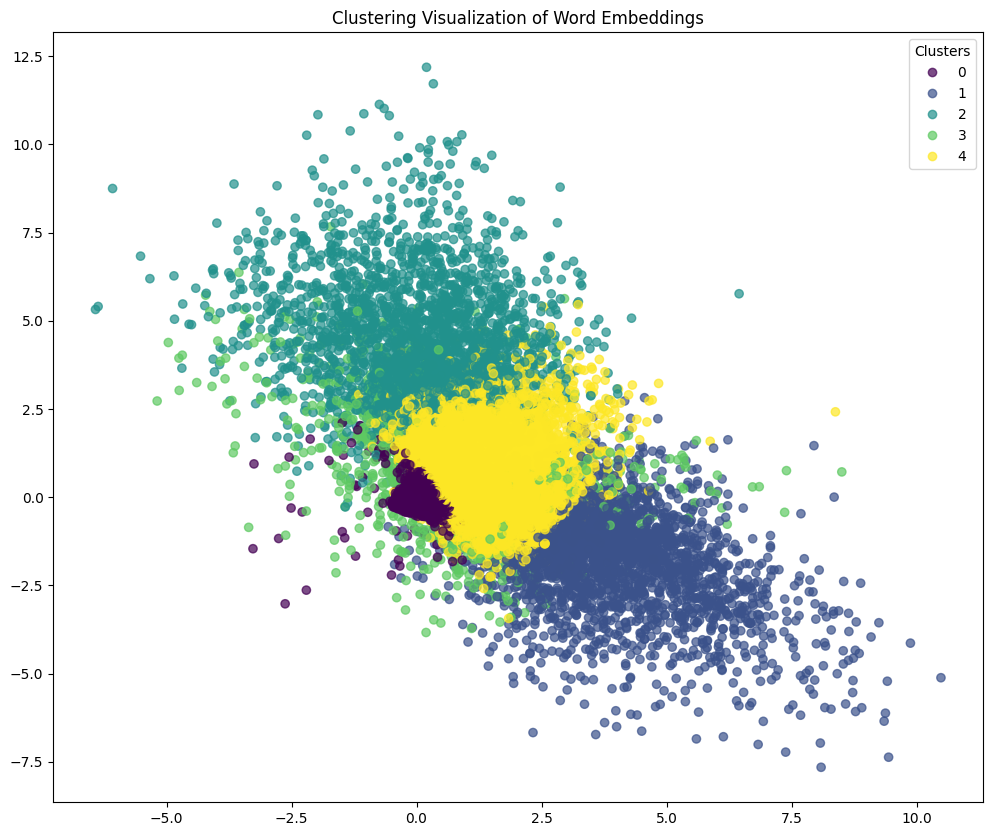

In [61]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the trained Word2Vec model
model = Word2Vec.load('/Users/sguhr/Desktop/Diss_Korpus/word2vec_model/word2vec_model.bin')  # Adjust the path accordingly

# Extract word vectors and corresponding words
words = list(model.wv.key_to_index.keys())
word_vectors = [model.wv[word] for word in words]

# Specify the number of clusters (you may adjust this based on your needs)
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(word_vectors)

# Apply PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Create a DataFrame for plotting
df = pd.DataFrame({'word': words, 'x': word_vectors_2d[:, 0], 'y': word_vectors_2d[:, 1], 'cluster': cluster_assignments})

# Plot the 2D scatter plot with color-coded clusters
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.title('Clustering Visualization of Word Embeddings')
plt.show()